## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

### We start by importing the py file ExchangeEconomy

In [122]:
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()

### Solving the question

This Python script visualizes the concept of Pareto improvements in economics. It:

1. Defines utility functions for two consumers, A and B.
2. Sets initial quantities of goods for A and calculates for B.
3. Calculates initial utilities for both consumers.
4. Generates a grid of possible quantities of goods for A.
5. Calculates utilities for all combinations for A and B.
6. Identifies combinations that are Pareto improvements.
7. Creates a figure representing the Edgeworth Box.
8. Displays the figure.

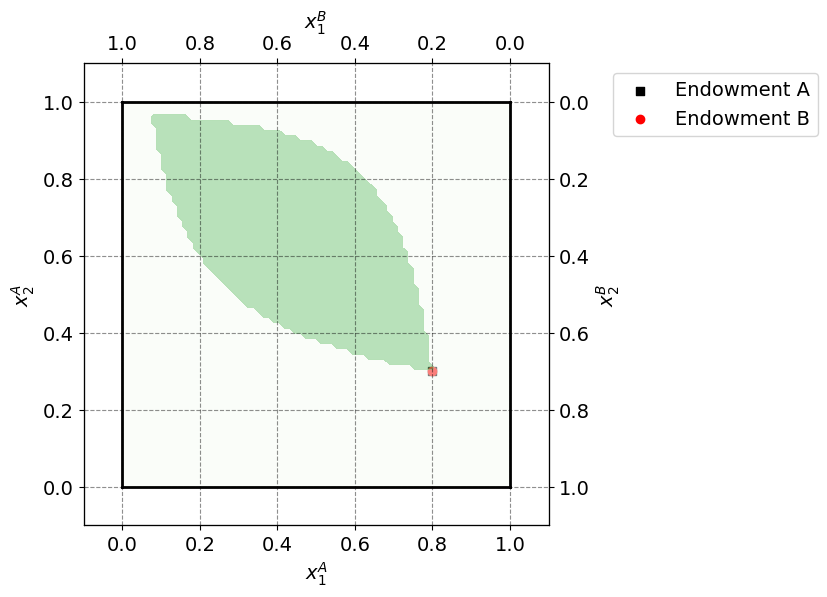

In [123]:

# Defining utility functions
def utility_A(x1A, x2A, alpha=1/3):
    """Calculate utility for consumer A."""
    return (x1A ** alpha) * (x2A ** (1 - alpha))

def utility_B(x1B, x2B, beta=2/3):
    """Calculate utility for consumer B."""
    return (x1B ** beta) * (x2B ** (1 - beta))

# Given initial endowments and parameters
w1A_initial = 0.8
w2A_initial = 0.3

# Calculating B's initial endowments based on total endowments minus A's
W1B_initial = 1 - w1A_initial
W2B_initial = 1 - w2A_initial

alpha = 1/3
beta = 2/3

# Initial utility for both consumers
utility_A_initial = utility_A(w1A_initial, w2A_initial, alpha)
utility_B_initial = utility_B(W1B_initial, W2B_initial, beta)

# Generate a grid of x1A and x2A values
x1A_vals = np.linspace(0, 1, 75)
x2A_vals = np.linspace(0, 1, 75)
x1A_grid, x2A_grid = np.meshgrid(x1A_vals, x2A_vals)

# Calculate utilities for all combinations for A and the corresponding for B
utility_A_grid = utility_A(x1A_grid, x2A_grid, alpha)
utility_B_grid = utility_B(1 - x1A_grid, 1 - x2A_grid, beta)

# Identify combinations that are Pareto improvements
pareto_improvements_mask = (utility_A_grid >= utility_A_initial) & (utility_B_grid >= utility_B_initial)

# Setting up the figure for the Edgeworth Box with four axes
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting the initial endowments
ax_A.scatter(w1A_initial, w2A_initial, marker='s', color='black', label='Endowment A')
# Adjusted plotting for B's endowment
ax_A.scatter(1 - W1B_initial, 1 - W2B_initial, marker='o', color='red', label='Endowment B')

# Plotting the bounds of the box
ax_A.plot([0, 1], [0, 0], lw=2, color='black')
ax_A.plot([0, 1], [1, 1], lw=2, color='black')
ax_A.plot([0, 0], [0, 1], lw=2, color='black')
ax_A.plot([1, 1], [0, 1], lw=2, color='black')

ax_A.set_xlim([-0.1, 1.1])
ax_A.set_ylim([-0.1, 1.1])
ax_B.set_xlim([1.1, -0.1])
ax_B.set_ylim([1.1, -0.1])

# Contour plot for Pareto improvements
ax_A.contourf(x1A_grid, x2A_grid, pareto_improvements_mask, cmap="Greens", alpha=0.5, levels=[0.5, 1], extend='both')

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()


It is worth noting that the endowments for A and B is at the some point. It can also be seen that any other allocations would be an pareto improvement, since both consumers would get atleats as much utility

# Question 2

This Python script calculates the market clearing error for a range of prices for a good, and then plots these errors.

It generates a range of prices and calculates the market clearing error for each price.
It plots the errors against the prices.
It labels the plot and displays it.

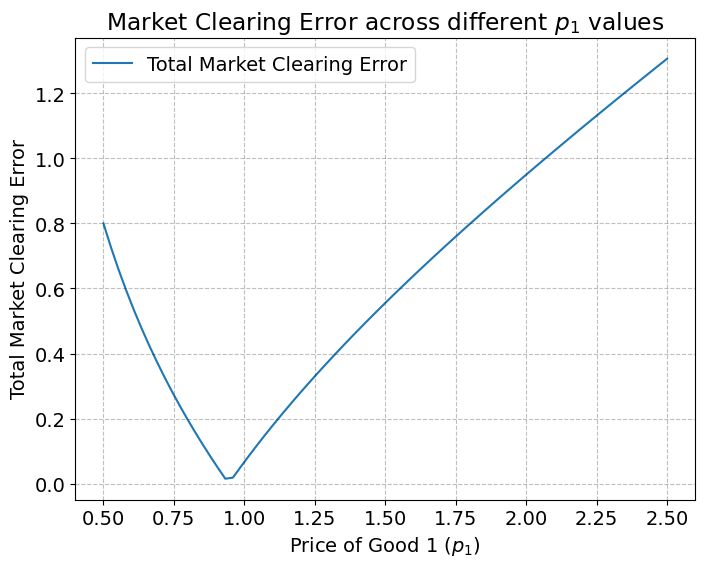

In [110]:

# Define a range of p1 values to explore
p_values = np.linspace(0.5, 2.5, 75)
ErrorList = []

# Calculate the market clearing errors for each p1 value
for p1 in p_values:
    total_error = model.market_clearing_error(p1)
    ErrorList.append(total_error)

# Plotting the total market clearing error against p1 values
plt.figure(figsize=(8, 6))
plt.plot(p_values, ErrorList, label='Total Market Clearing Error', zorder=1)
plt.xlabel('Price of Good 1 ($p_1$)')
plt.ylabel('Total Market Clearing Error')
plt.title('Market Clearing Error across different $p_1$ values')
plt.legend()
plt.grid(True)
plt.show()


We see that the Market clearing error decrease as the price increases to around 1 and then its starts to increase again af the price of good 1 increase

# Question 3

In [111]:
# Find the market-clearing price using the method from the class
market_clearing_price = model.find_market_clearing_price()
print(f"Market-Clearing Price for Good 1: {market_clearing_price:.4f}")

Market-Clearing Price for Good 1: 0.9444


Hence the market clearing price that minimizes the error is 0.9444

# Question 4A

This Python script calculates the optimal price and allocation of goods for Consumer A that maximizes their utility. It does this over a range of discrete prices for a good. The results are then printed out.

In [124]:
P1 = np.linspace(0.5, 2.5, 75)  # Define your set of discrete prices

optimal_price, optimal_allocation_A, max_utility = model.maximize_consumer_A_utility_discrete(P1)
print(f"Optimal price for Consumer A (discrete): {optimal_price:.4f}")
print(f"Optimal allocation for Consumer A: x1A={optimal_allocation_A[0]:.4f}, x2A={optimal_allocation_A[1]:.4f}")
print(f"Maximum utility for Consumer A: {max_utility:.4f}")


Optimal price for Consumer A (discrete): 1.9054
Optimal allocation for Consumer A: x1A=0.6217, x2A=0.6396
Maximum utility for Consumer A: 0.6336


# Question 4B

This Python script calculates the optimal price and allocation of goods for Consumer A that maximizes their utility over a continuous range of prices. The results are then printed out.

In [126]:
# Assuming 'model' is an instance of your ExchangeEconomyClass
optimal_price_continuous, optimal_allocation_A_continuous, max_utility_continuous = model.maximize_consumer_A_utility_continuous()

# Displaying the results
print(f"Optimal price for Consumer A (continuous): {optimal_price_continuous:.4f}")
print(f"Optimal allocation for Consumer A: x1A={optimal_allocation_A_continuous[0]:.4f}, x2A={optimal_allocation_A_continuous[1]:.4f}")
print(f"Maximum utility for Consumer A: {max_utility_continuous:.4f}")


Optimal price for Consumer A (continuous): 1.8993
Optimal allocation for Consumer A: x1A=0.6210, x2A=0.6400
Maximum utility for Consumer A: 0.6336


# Question 5A

This script optimizes the allocation of goods for Consumer A to maximize their utility while ensuring Pareto improvements. The optimal allocation and maximum utility are then printed out.

In [114]:
# Optimize the allocation for Pareto improvements
optimal_allocation, max_utility = model.optimize_allocation_pareto_improvement()

# Display the results
print(f"Optimal allocation for Consumer A: x1A = {optimal_allocation[0]:.4f}, x2A = {optimal_allocation[1]:.4f}")
print(f"Maximum utility for Consumer A under Pareto improvement: {max_utility:.4f}")

Optimal allocation for Consumer A: x1A = 0.5757, x2A = 0.8444
Maximum utility for Consumer A under Pareto improvement: 0.7432


# Question 5B

This Python script runs an optimization process to find the best allocation of goods for Consumer A that maximizes their utility, while ensuring Consumer B's utility is not less than their initial utility. The optimal allocations and utilities are then printed out.

In [115]:
# Run the optimization
model.maximize_utility_unrestricted()

The optimal allocation for A is: (0.5757, 0.8444)
The optimal allocation for B is: (0.4243, 0.1556)
A's utility: 0.7432
B's utility: 0.3037
Total utility: 1.0469


# Question 6A

In [127]:
# Maximize the aggregate utility
optimal_allocation_A, optimal_allocation_B, total_utility = model.maximize_aggregate_utility()

# Display the results
print(f"Optimal allocation for Consumer A: x1A={optimal_allocation_A[0]:.4f}, x2A={optimal_allocation_A[1]:.4f}")
print(f"Optimal allocation for Consumer B: x1B={optimal_allocation_B[0]:.4f}, x2B={optimal_allocation_B[1]:.4f}")
print(f"Total aggregate utility: {total_utility:.4f}")


Optimal allocation for Consumer A: x1A=0.3334, x2A=0.6668
Optimal allocation for Consumer B: x1B=0.6666, x2B=0.3332
Total aggregate utility: 1.0583


# Question 6B

Using the same plot as in question 1 we can now plot the new allocation

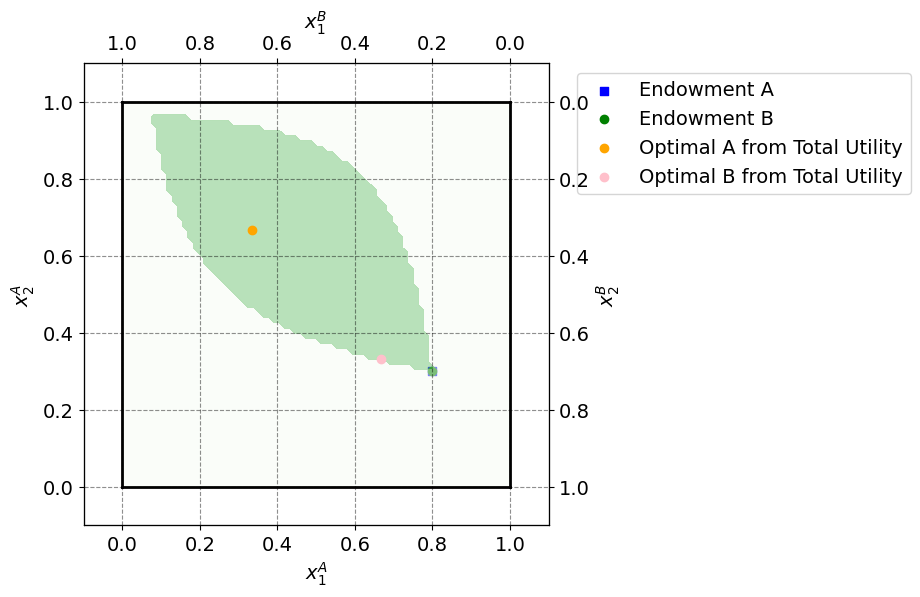

In [128]:
# Defining utility functions
def utility_A(x1A, x2A, alpha=1/3):
    """Calculate utility for consumer A."""
    return (x1A ** alpha) * (x2A ** (1 - alpha))

def utility_B(x1B, x2B, beta=2/3):
    """Calculate utility for consumer B."""
    return (x1B ** beta) * (x2B ** (1 - beta))

# Given initial endowments and parameters
w1A_initial = 0.8
w2A_initial = 0.3

# Calculating B's initial endowments based on total endowments minus A's
W1B_initial = 1 - w1A_initial
W2B_initial = 1 - w2A_initial

alpha = 1/3
beta = 2/3

# Initial utility for both consumers
utility_A_initial = utility_A(w1A_initial, w2A_initial, alpha)
utility_B_initial = utility_B(W1B_initial, W2B_initial, beta)

# Generate a grid of x1A and x2A values
x1A_vals = np.linspace(0, 1, 75)
x2A_vals = np.linspace(0, 1, 75)
x1A_grid, x2A_grid = np.meshgrid(x1A_vals, x2A_vals)

# Calculate utilities for all combinations for A and the corresponding for B
utility_A_grid = utility_A(x1A_grid, x2A_grid, alpha)
utility_B_grid = utility_B(1 - x1A_grid, 1 - x2A_grid, beta)

# Identify combinations that are Pareto improvements
pareto_improvements_mask = (utility_A_grid >= utility_A_initial) & (utility_B_grid >= utility_B_initial)

# Setting up the figure for the Edgeworth Box with four axes
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting the initial endowments with new colors
ax_A.scatter(w1A_initial, w2A_initial, marker='s', color='blue', label='Endowment A')
ax_A.scatter(1 - W1B_initial, 1 - W2B_initial, marker='o', color='green', label='Endowment B')

# Plotting the bounds of the box
ax_A.plot([0, 1], [0, 0], lw=2, color='black')
ax_A.plot([0, 1], [1, 1], lw=2, color='black')
ax_A.plot([0, 0], [0, 1], lw=2, color='black')
ax_A.plot([1, 1], [0, 1], lw=2, color='black')

ax_A.set_xlim([-0.1, 1.1])
ax_A.set_ylim([-0.1, 1.1])
ax_B.set_xlim([1.1, -0.1])
ax_B.set_ylim([1.1, -0.1])

# Contour plot for Pareto improvements
ax_A.contourf(x1A_grid, x2A_grid, pareto_improvements_mask, cmap="Greens", alpha=0.5, levels=[0.5, 1], extend='both')

# Calculate the optimal allocation that maximizes total utility
optimal_allocation_A_total, optimal_allocation_B_total, _ = model.maximize_total_utility()

# Add the optimal allocation from maximize_total_utility to the plot with new colors
ax_A.scatter(optimal_allocation_A_total[0], optimal_allocation_A_total[1], color='orange', label='Optimal A from Total Utility', zorder=5)
ax_A.scatter(1 - optimal_allocation_A_total[0], 1 - optimal_allocation_A_total[1], color='pink', label='Optimal B from Total Utility', zorder=5)

# Move the legend to the right
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.8, 1.0))

plt.show()

# Question 7

Generate 50 random numbers between 0 and 1, and uses 2024 as seed so we can reproduce the result

In [118]:
# Number of elements in the set
n = 50

# Generate n pairs of random numbers between 0 and 1
np.random.seed(2024)
W = [(np.random.uniform(0, 1), np.random.uniform(0, 1)) for _ in range(n)]

# Print the set
for i, element in enumerate(W):
    print(f"Element {i+1}: {element}")

Element 1: (0.5880145188953979, 0.6991087476815825)
Element 2: (0.18815196003850598, 0.043808563746864815)
Element 3: (0.2050189523942888, 0.10606287447626572)
Element 4: (0.7272401436844548, 0.6794005235251416)
Element 5: (0.4738457034082185, 0.4482958244803046)
Element 6: (0.01910694787246603, 0.7525983372085793)
Element 7: (0.6024485390081266, 0.9617775753081896)
Element 8: (0.6643686473564756, 0.6066296193186763)
Element 9: (0.44915131493171645, 0.22535416319269552)
Element 10: (0.6701742968926956, 0.7357665924519133)
Element 11: (0.2579956380781936, 0.09554215386036546)
Element 12: (0.9609097422366777, 0.2517672867680111)
Element 13: (0.2821651194436432, 0.7682539346627851)
Element 14: (0.7979233971149834, 0.5440371984004161)
Element 15: (0.3827076306466419, 0.38165095020199724)
Element 16: (0.2858273884771829, 0.7402681531406573)
Element 17: (0.23898683243572905, 0.4377217046498637)
Element 18: (0.8835387027765857, 0.2892811403327177)
Element 19: (0.784506857087421, 0.75895365677

# Question 8

Finding equlibria

In [119]:
# Assuming ExchangeEconomyClass and methods are defined as in your .py file
model = ExchangeEconomyClass()

equilibria = []

for omega in W:
    model.par.w1A, model.par.w2A = omega
    p1_star = model.find_market_clearing_price()
    x1A_star, x2A_star = model.demand_A(p1_star)
    x1B_star, x2B_star = model.demand_B(p1_star)
    equilibria.append(((x1A_star, x2A_star), (x1B_star, x2B_star)))


Plotting 

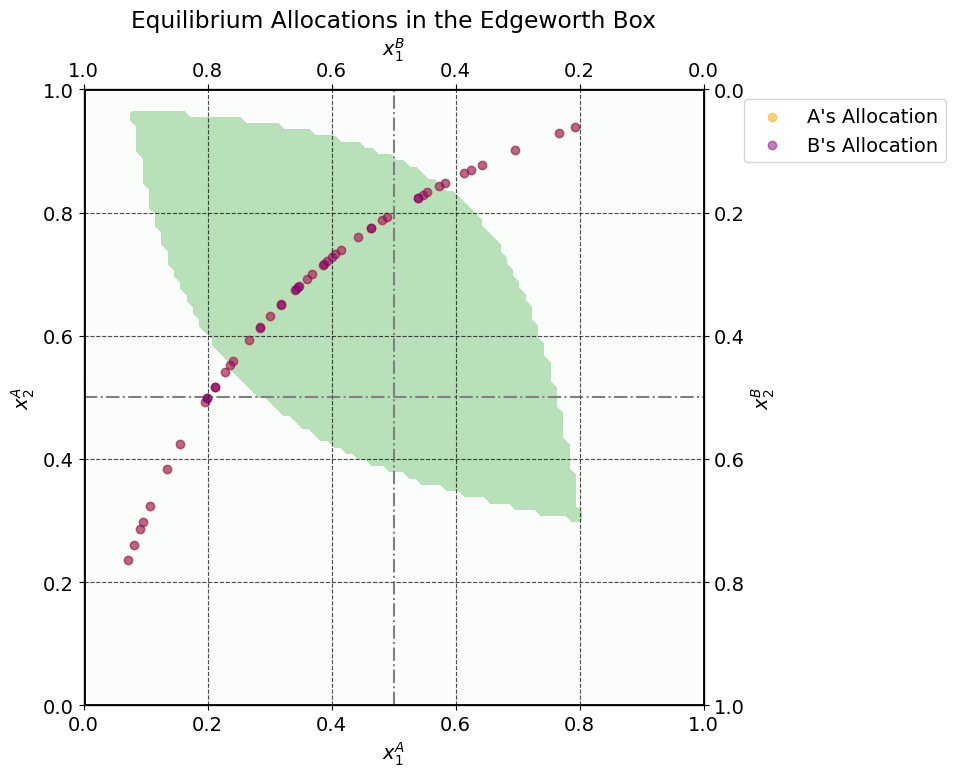

In [120]:
# Initialize figure for the Edgeworth Box
fig = plt.figure(figsize=(8, 8))
ax_A = fig.add_subplot(1, 1, 1)

# Setting limits for the Edgeworth Box based on total resources
total_resources = [1, 1]  # Total amount of x1 and x2 in the economy

ax_A.set_xlim(0, total_resources[0])
ax_A.set_ylim(0, total_resources[1])
ax_A.set_xlabel('$x_{1}^A$')
ax_A.set_ylabel('$x_{2}^A$')

# Create the second set of axes
temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
temp.set_ylim(0, total_resources[1])  # Set limits for B's y-axis
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.set_xlim(0, total_resources[0])  # Set limits for B's x-axis
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Create a grid of points in the Edgeworth box
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Calculate utilities for all combinations for A and the corresponding for B
utility_A_grid = utility_A(X, Y, alpha)
utility_B_grid = utility_B(1 - X, 1 - Y, beta)

# Identify combinations that are Pareto improvements
pareto_improvements_mask = (utility_A_grid >= utility_A_initial) & (utility_B_grid >= utility_B_initial)

# Contour plot for Pareto improvements
ax_A.contourf(X, Y, pareto_improvements_mask, cmap="Greens", alpha=0.5, levels=[0.5, 1], extend='both')

# Plot each equilibrium allocation for A and B
for ((x1A, x2A), (x1B, x2B)) in equilibria:
    ax_A.scatter(x1A, x2A, color='orange', alpha=0.5)  # Plotting A's allocation
    ax_B.scatter(x1B, x2B, color='purple', alpha=0.5)  # Plotting B's allocation on the inverted axes

# Optional: Enhancements for visualization
ax_A.axhline(y=0.5, color='grey', linestyle='-.')  # Halfway line for x2 resources
ax_A.axvline(x=0.5, color='grey', linestyle='-.')  # Halfway line for x1 resources

# Adding a legend to distinguish between A's and B's allocations
ax_A.scatter([], [], color='orange', alpha=0.5, label='A\'s Allocation')  # Dummy scatter for A's legend
ax_A.scatter([], [], color='purple', alpha=0.5, label='B\'s Allocation')  # Dummy scatter for B's legend
ax_A.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Plotting the bounds of the box
ax_A.plot([0, 1], [0, 0], lw=2, color='black')
ax_A.plot([0, 1], [1, 1], lw=2, color='black')
ax_A.plot([0, 0], [0, 1], lw=2, color='black')
ax_A.plot([1, 1], [0, 1], lw=2, color='black')

# Adding a grid
ax_A.grid(True, linestyle='--', alpha=0.6)

plt.title('Equilibrium Allocations in the Edgeworth Box')
plt.show()

We can see that all tha allocations inside the green field is possible, hence we also have some allocatiions that are not possible, given given the sum would be greater than 1